# NanoAODplus_analyzer

In [1]:
import time

from coffea import hist
from coffea.analysis_objects import JaggedCandidateArray
import coffea.processor as processor
from awkward import JaggedArray
import numpy as np
from pprint import pprint

from nanoAODplus_processor.EventSelectorProcessor import EventSelectorProcessor
from data.fileset import filesets
import yaml

import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use(hep.style.CMS)

In [2]:
config_yaml = yaml.load(open("config/local.yaml", "r"), Loader=yaml.FullLoader)

if config_yaml['executor'] == 'futures_executor': 
    executor = processor.futures_executor
    
tstart = time.time()

files = {'Charmonium2017ULMINIAOD': filesets['Charmonium2017MINIAOD'][0:200], 
           'MuOnia2017ULMINIAOD': filesets['MuOnia2017MINIAOD'][0:200], 
           'DoubleMuon2017ULAOD': filesets['DoubleMuon2017AOD'][0:600]
          }

output = processor.run_uproot_job(files,
                                  treename='Events',
                                  processor_instance=EventSelectorProcessor(),
                                  #executor=processor.iterative_executor,
                                  #executor_args={'flatten': True},
                                  executor=executor,
                                  #executor_args={'workers': 6, 'flatten': True},
                                  executor_args={'workers': 8, 'flatten': True},
                                  chunksize=config_yaml['chunksize'],
                                 )

elapsed = time.time() - tstart
print(output)


{'muon_pt': <Hist (dataset,pt) instance at 0x7f9d3fdbc198>, 'muon_eta': <Hist (dataset,eta) instance at 0x7f9d34b4b4e0>, 'muon_phi': <Hist (dataset,phi) instance at 0x7f9d34b4b6a0>, 'dimu_mass': <Hist (dataset,mass) instance at 0x7f9d34a80dd8>, 'dimu_pt': <Hist (dataset,pt) instance at 0x7f9d34a80da0>, 'dimu_eta': <Hist (dataset,eta) instance at 0x7f9d34a80eb8>, 'dimu_phi': <Hist (dataset,phi) instance at 0x7f9d34a809b0>, 'D0_mass': <Hist (dataset,mass) instance at 0x7f9d34a806a0>, 'D0_pt': <Hist (dataset,pt) instance at 0x7f9d34a80d30>, 'D0_eta': <Hist (dataset,eta) instance at 0x7f9d34a80748>, 'D0_phi': <Hist (dataset,phi) instance at 0x7f9d34a80898>, 'cutflow': defaultdict(<class 'int'>, {'all events': 38919661, 'all muons': 190955569, 'all D0': 844961931, 'soft muon': 133918899, 'global muon': 80804299, 'pt cut': 74693346, 'eta cut': 74586647, 'iso muon': 21312883, 'valid vtx': 21311092, 'two muons': 5547185, 'D0 two muons': 99133237, 'opposite charge': 5353465, 'same vtx': 512841

/afs/cern.ch/user/k/kmotaama/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.6/site-packages/mplhep/_deprecate.py:56: DeprecationWarning: kwarg "densitymode" in function "histplot" is deprecated and may be removed in future versions: "unit"mode is not useful
  return func(*args, **kwargs)


(0.0, 100.0)

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.


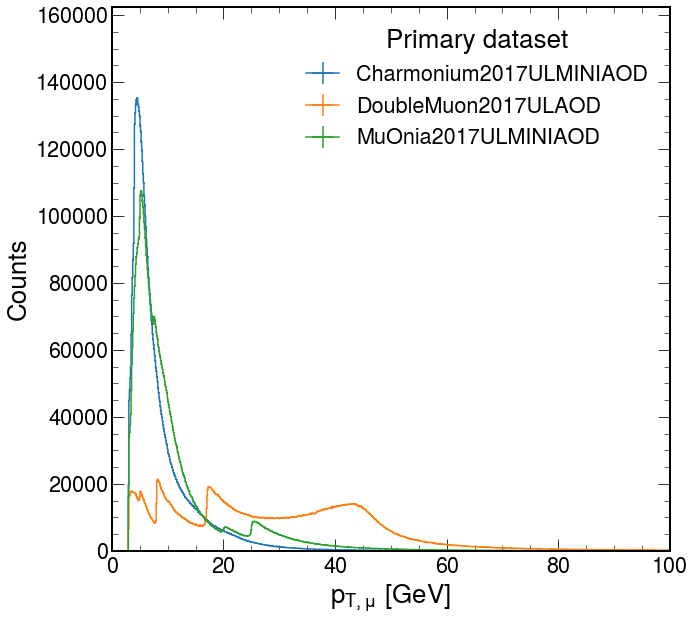

In [3]:
ax = hist.plot1d(output['muon_pt'], overlay='dataset')
ax.set_xlim(0,100)

/afs/cern.ch/user/k/kmotaama/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.6/site-packages/mplhep/_deprecate.py:56: DeprecationWarning: kwarg "densitymode" in function "histplot" is deprecated and may be removed in future versions: "unit"mode is not useful
  return func(*args, **kwargs)


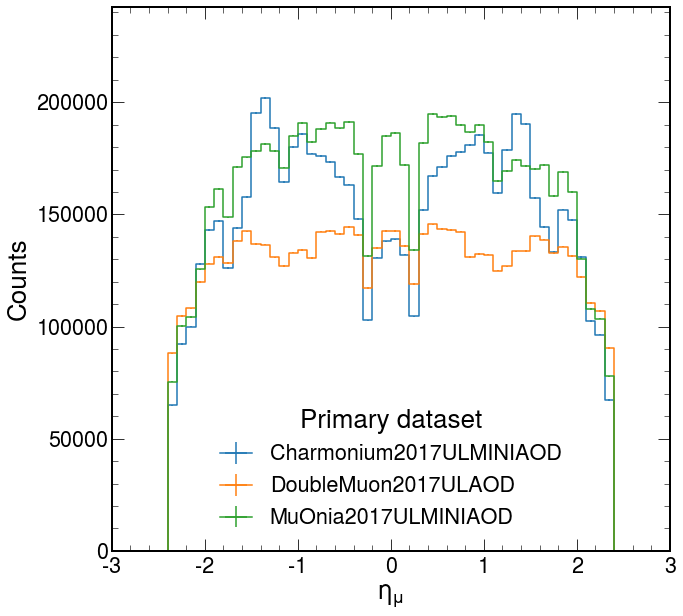

In [4]:
ax = hist.plot1d(output['muon_eta'], overlay='dataset')

/afs/cern.ch/user/k/kmotaama/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.6/site-packages/mplhep/_deprecate.py:56: DeprecationWarning: kwarg "densitymode" in function "histplot" is deprecated and may be removed in future versions: "unit"mode is not useful
  return func(*args, **kwargs)


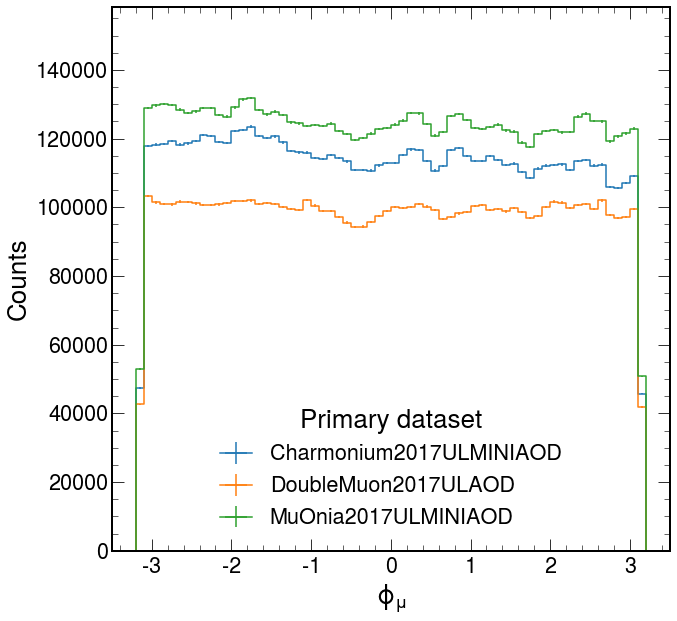

In [5]:
ax = hist.plot1d(output['muon_phi'], overlay='dataset')

/afs/cern.ch/user/k/kmotaama/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.6/site-packages/mplhep/_deprecate.py:56: DeprecationWarning: kwarg "densitymode" in function "histplot" is deprecated and may be removed in future versions: "unit"mode is not useful
  return func(*args, **kwargs)


(2.5, 12.0)

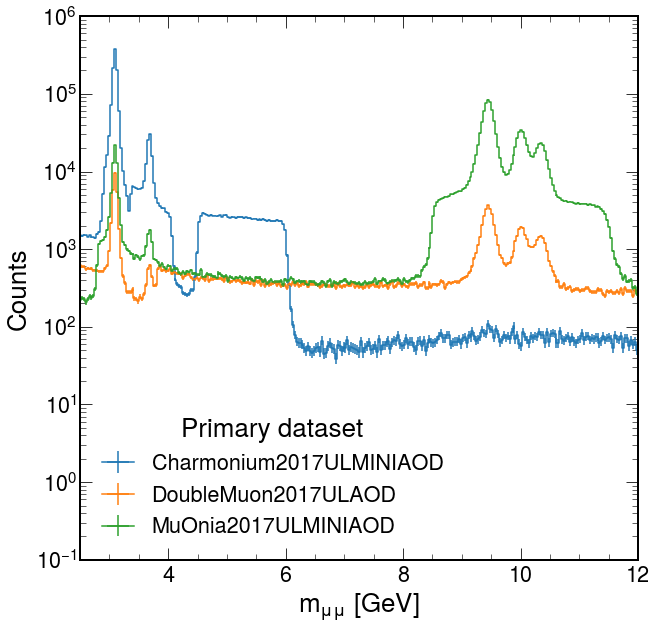

In [6]:
ax = hist.plot1d(output['dimu_mass'], overlay='dataset')
ax.set_yscale('log')
ax.set_ylim(0.1,1e6)
ax.set_xlim(2.5,12)

/afs/cern.ch/user/k/kmotaama/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.6/site-packages/mplhep/_deprecate.py:56: DeprecationWarning: kwarg "densitymode" in function "histplot" is deprecated and may be removed in future versions: "unit"mode is not useful
  return func(*args, **kwargs)


(0.0, 20.0)

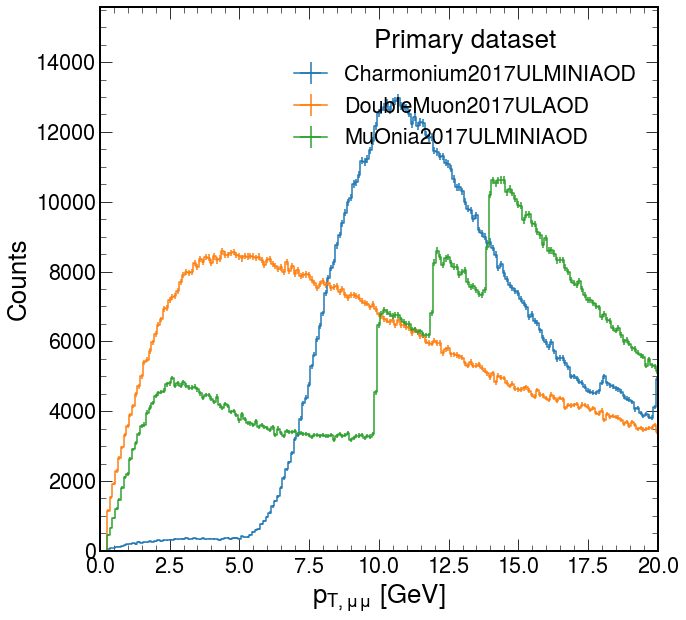

In [7]:
ax = hist.plot1d(output['dimu_pt'], overlay='dataset')
ax.set_xlim(0,20)

/afs/cern.ch/user/k/kmotaama/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.6/site-packages/mplhep/_deprecate.py:56: DeprecationWarning: kwarg "densitymode" in function "histplot" is deprecated and may be removed in future versions: "unit"mode is not useful
  return func(*args, **kwargs)


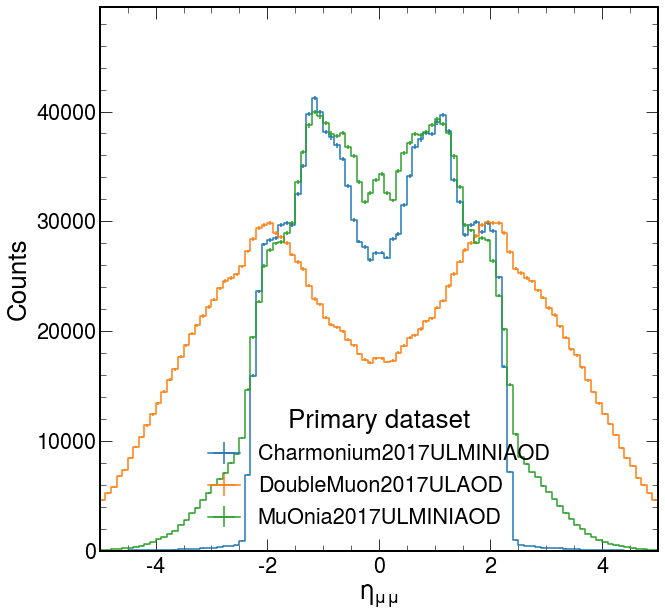

In [8]:
ax= hist.plot1d(output['dimu_eta'], overlay='dataset')

/afs/cern.ch/user/k/kmotaama/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.6/site-packages/mplhep/_deprecate.py:56: DeprecationWarning: kwarg "densitymode" in function "histplot" is deprecated and may be removed in future versions: "unit"mode is not useful
  return func(*args, **kwargs)


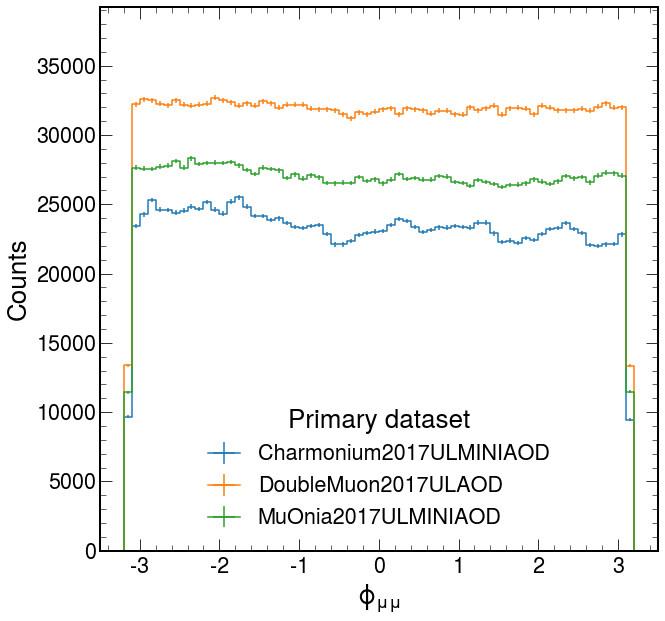

In [9]:
ax= hist.plot1d(output['dimu_phi'], overlay='dataset')

In [10]:
print("Events/s:", output['cutflow']['all events']/elapsed, "Time elapsed:", elapsed)
print(output['cutflow'])

Events/s: 5448.550724901936 Time elapsed: 7143.121715307236
defaultdict(<class 'int'>, {'all events': 38919661, 'all muons': 190955569, 'all D0': 844961931, 'soft muon': 133918899, 'global muon': 80804299, 'pt cut': 74693346, 'eta cut': 74586647, 'iso muon': 21312883, 'valid vtx': 21311092, 'two muons': 5547185, 'D0 two muons': 99133237, 'opposite charge': 5353465, 'same vtx': 5128413})


/afs/cern.ch/user/k/kmotaama/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.6/site-packages/mplhep/_deprecate.py:56: DeprecationWarning: kwarg "densitymode" in function "histplot" is deprecated and may be removed in future versions: "unit"mode is not useful
  return func(*args, **kwargs)


(1.0, 2.5)

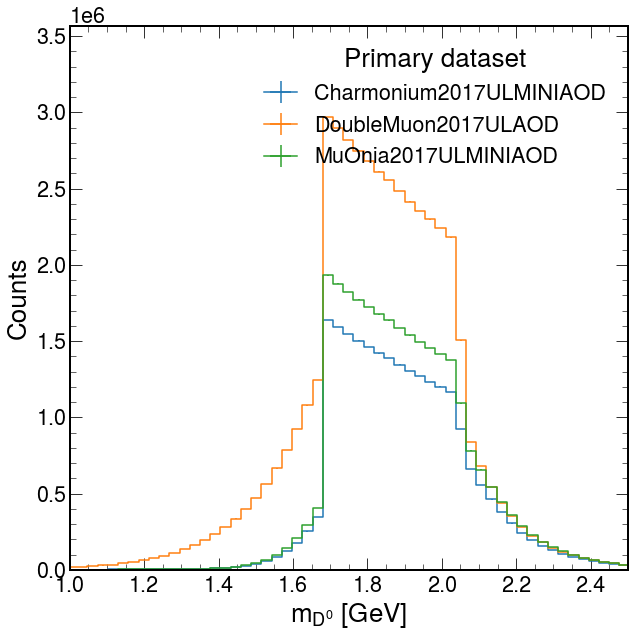

In [11]:
ax= hist.plot1d(output['D0_mass'], overlay='dataset')
ax.set_xlim(1.0,2.5)

/afs/cern.ch/user/k/kmotaama/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.6/site-packages/mplhep/_deprecate.py:56: DeprecationWarning: kwarg "densitymode" in function "histplot" is deprecated and may be removed in future versions: "unit"mode is not useful
  return func(*args, **kwargs)


(0.0, 10.0)

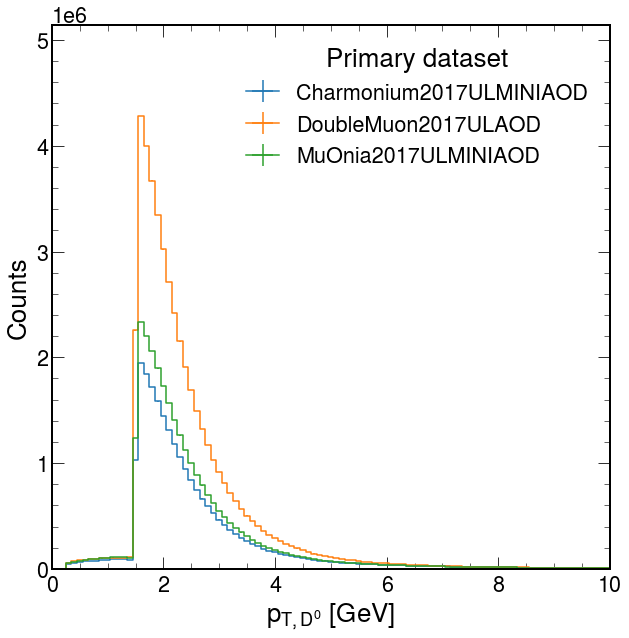

In [12]:
ax= hist.plot1d(output['D0_pt'], overlay='dataset')
ax.set_xlim(0,10)

/afs/cern.ch/user/k/kmotaama/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.6/site-packages/mplhep/_deprecate.py:56: DeprecationWarning: kwarg "densitymode" in function "histplot" is deprecated and may be removed in future versions: "unit"mode is not useful
  return func(*args, **kwargs)


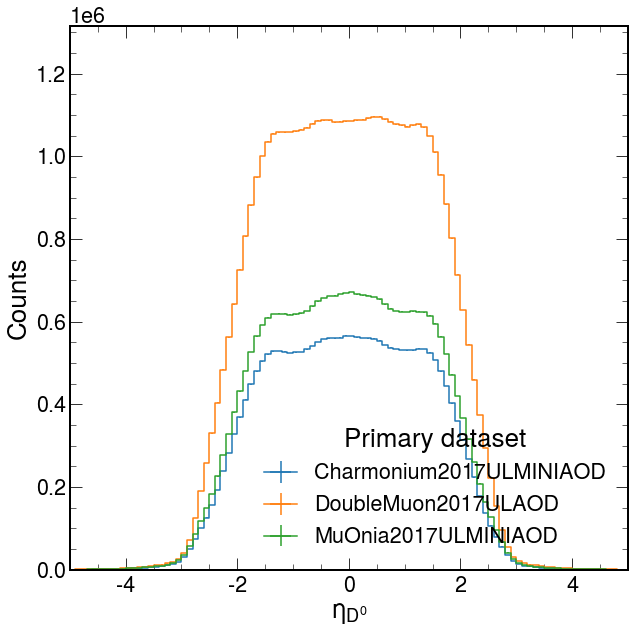

In [13]:
ax= hist.plot1d(output['D0_eta'], overlay='dataset')

/afs/cern.ch/user/k/kmotaama/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.6/site-packages/mplhep/_deprecate.py:56: DeprecationWarning: kwarg "densitymode" in function "histplot" is deprecated and may be removed in future versions: "unit"mode is not useful
  return func(*args, **kwargs)


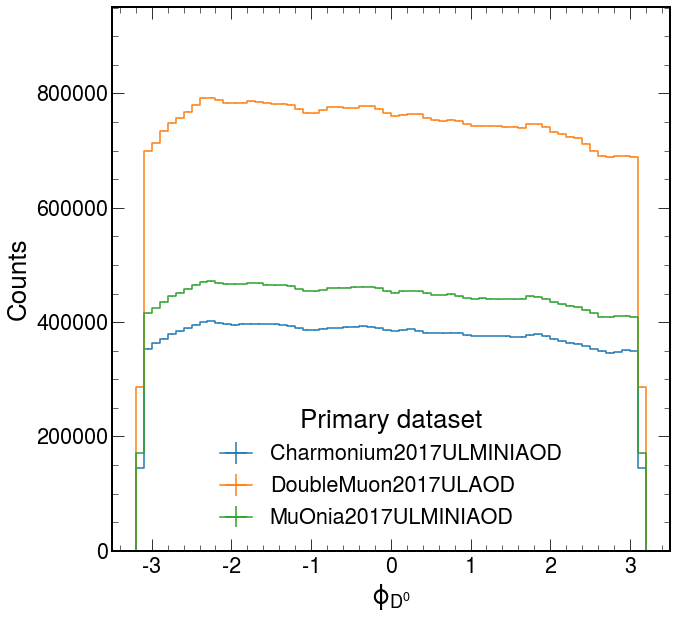

In [14]:
ax= hist.plot1d(output['D0_phi'], overlay='dataset')